In [24]:
import pandas as pd

In [25]:
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
html_page = requests.get('https://en.wikipedia.org/wiki/List_of_Academy_Award_winners_and_nominees_for_Best_Foreign_Language_Film')
soup = BeautifulSoup(html_page.content, 'html.parser')

In [27]:

def get_text():
    #scrape all tags with ('a')
    titles = soup.find_all('a')  
    countriess = []
    for i in range(len(titles)):
        
        texts = titles[i].get_text()
        
        countries.append(texts)
    return countries

In [28]:
list1=get_text()

del list1 [0:140]
list2 = list1

list3= []
for i in list2:
    if i == '[K]' or i=='':
        del i
    else:
        list3.append(i)
del list3[1148:]

NameError: name 'countries' is not defined

In [29]:
from countries1 import world_countries,former_countries


In [30]:

list4=[]

for i in list3:
    
    if i in world_countries or i in former_countries:
        list4.append(i)
    else:
        pass
unique_countries = set(list4)


In [31]:
len(unique_countries)


53

In [32]:
country_histogram = dict.fromkeys(unique_countries, 0)

for word in list5:
    country_histogram[word] = country_histogram[word]+ 1

In [33]:
df=pd.DataFrame.from_dict(country_histogram, orient='index').reset_index()
df.columns=['Country','Nomenees']
df = df.set_index("Country")
df.head()

,Nomenees
Country,
Austria,4
Australia,1
Sweden,16
Taiwan,3
South Africa,2


In [34]:

df['Nomenees']['Russia']=16
df['Nomenees']['Germany']=20
df['Nomenees']['Czech Republic']=9
df =df.drop(['Soviet Union','Germany (East)','Germany (West)','Czechoslovakia'])




In [35]:
df.reset_index()

,Country,Nomenees
0,Austria,4
1,Australia,1
2,Sweden,16
3,Taiwan,3
4,South Africa,2
5,Algeria,5
6,Chile,2
7,France,37
8,Netherlands,7
9,Mauritania,1


In [36]:
df2=pd.read_csv('world_population_2017.csv')

df2.head()

,Data Source,Unnamed: 1
0,NaN,NaN
1,Last Updated Date,NaN
2,NaN,NaN
3,Country Name,2017.0
4,Aruba,105264.0


In [23]:
movies_df = pd.merge(df, df2, left_on ='Country', right_on='Data Source',how = 'left',suffixes=('', '_y'))
movies_df.head()

,Nomenees,Data Source,Unnamed: 1
0,4,Austria,8809212.0
1,1,Australia,24598933.0
2,16,Sweden,10067744.0
3,3,NaN,NaN
4,2,South Africa,56717156.0


In [39]:
movies_df.rename(columns={'Unnamed: 1':'Population 2017'}, inplace=True)
movies_df.rename(columns={'Data Source':'Country'}, inplace=True)
movies_df.head()

,Nomenees,Country,Population 2017
0,13,Japan,126785797.0
1,7,Canada,36708083.0
2,4,Brazil,209288278.0
3,19,Spain,46572028.0
4,10,Hungary,9781127.0


In [40]:
movies_df.set_index("Country")
movies_df.head()

,Nomenees,Country,Population 2017
0,13,Japan,126785797.0
1,7,Canada,36708083.0
2,4,Brazil,209288278.0
3,19,Spain,46572028.0
4,10,Hungary,9781127.0


In [42]:
movies_df['Population 2017']['Iran']= 81160000
movies_df['Population 2017']['Macedonia']=2740000
movies_df['Population 2017']['Taiwan']=23580000
movies_df['Population 2017']['Ivory Coast']=24290000
movies_df

,Nomenees,Country,Population 2017
0,13,Japan,1.267858e+08
1,7,Canada,3.670808e+07
2,4,Brazil,2.092883e+08
3,19,Spain,4.657203e+07
4,10,Hungary,9.781127e+06
5,7,Belgium,1.137207e+07
6,10,Israel,8.712400e+06
7,1,Georgia,3.717100e+06
8,1,Finland,5.511303e+06
9,3,NaN,NaN


In [16]:


#movies_df['ratio-nomenees-population']= movies_df["Population 2017"]/movies_df["Nomenees"]
movies_df






,Country,Nomenees,Population 2017
0,Denmark,12,5.769603e+06
1,Uruguay,1,3.456750e+06
2,Austria,4,8.809212e+06
3,Algeria,5,4.131814e+07
4,India,3,1.339180e+09
5,Norway,5,5.282223e+06
6,Soviet Union,9,NaN
7,Germany (East),1,NaN
8,Taiwan,3,NaN
9,Kazakhstan,1,1.803765e+07


In [45]:
ratio = movies_df.sort_values(by='ratio-nomenees-population')
ratio.set_index("Country")

,Nomenees,Population 2017,ratio-nomenees-population
Country,,,
Iceland,1,3.412840e+05,3.412840e+05
Denmark,12,5.769603e+06,4.808002e+05
Sweden,16,1.006774e+07,6.292340e+05
Israel,10,8.712400e+06,8.712400e+05
Hungary,10,9.781127e+06,9.781127e+05
Norway,5,5.282223e+06,1.056445e+06
Czech Republic,9,1.059132e+07,1.176814e+06
Estonia,1,1.315480e+06,1.315480e+06
Belgium,7,1.137207e+07,1.624581e+06


Text(0.5, 1.0, 'Countries with most Academy Awards Nomenees')

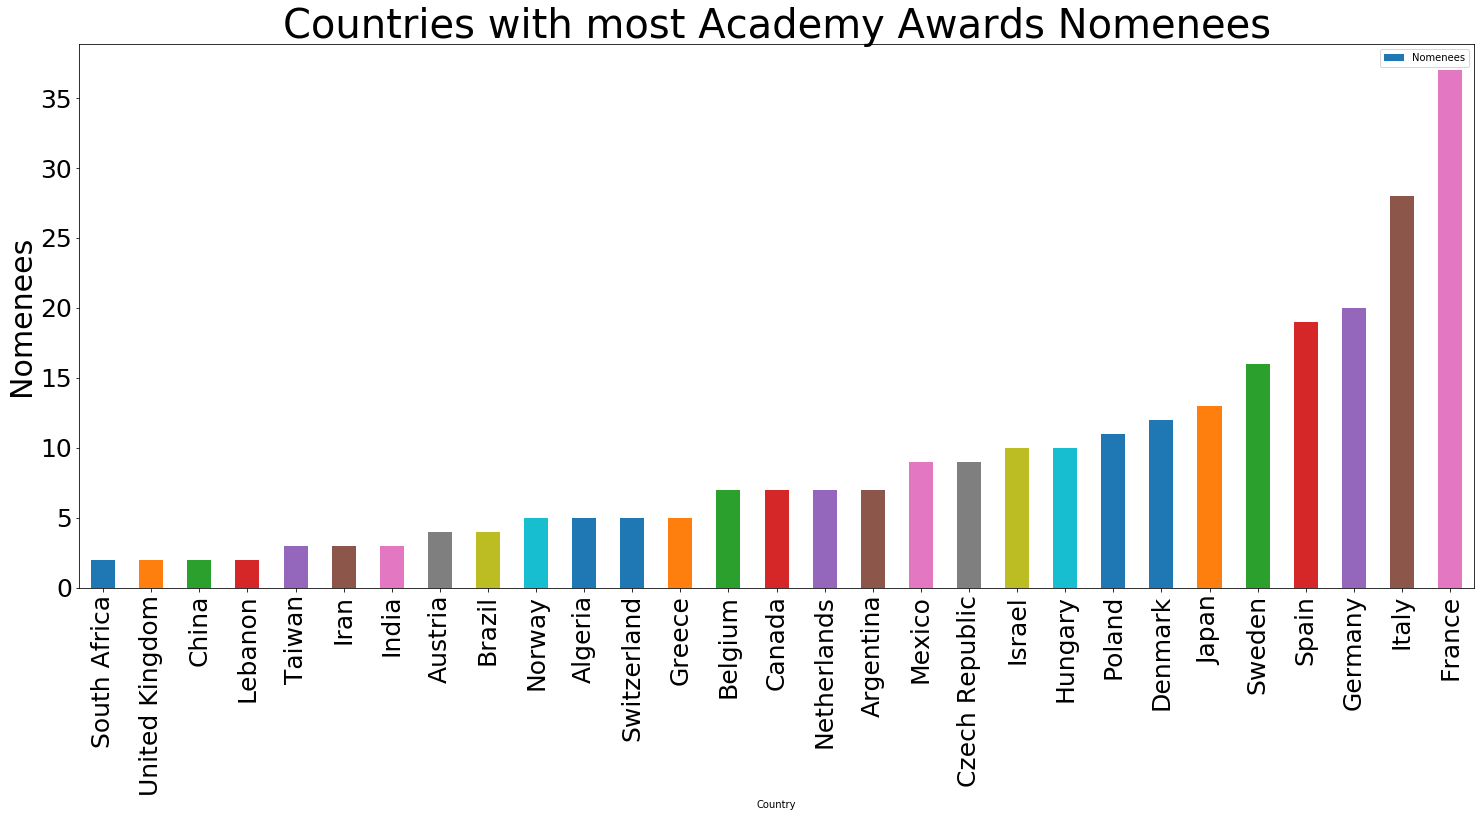

In [72]:
nomenees = movies_df.sort_values(by='Nomenees')

Table = nomenees[19:].plot.bar(x='Country', y='Nomenees',figsize=(25,10) ,fontsize=25)
Table.set_ylabel("Nomenees",fontsize=30)
Table.set_title("Countries with most Academy Awards Nomenees",fontsize=40)


Text(0.5, 1.0, 'Countries with most Academy Awards Nomenees Relative to Population')

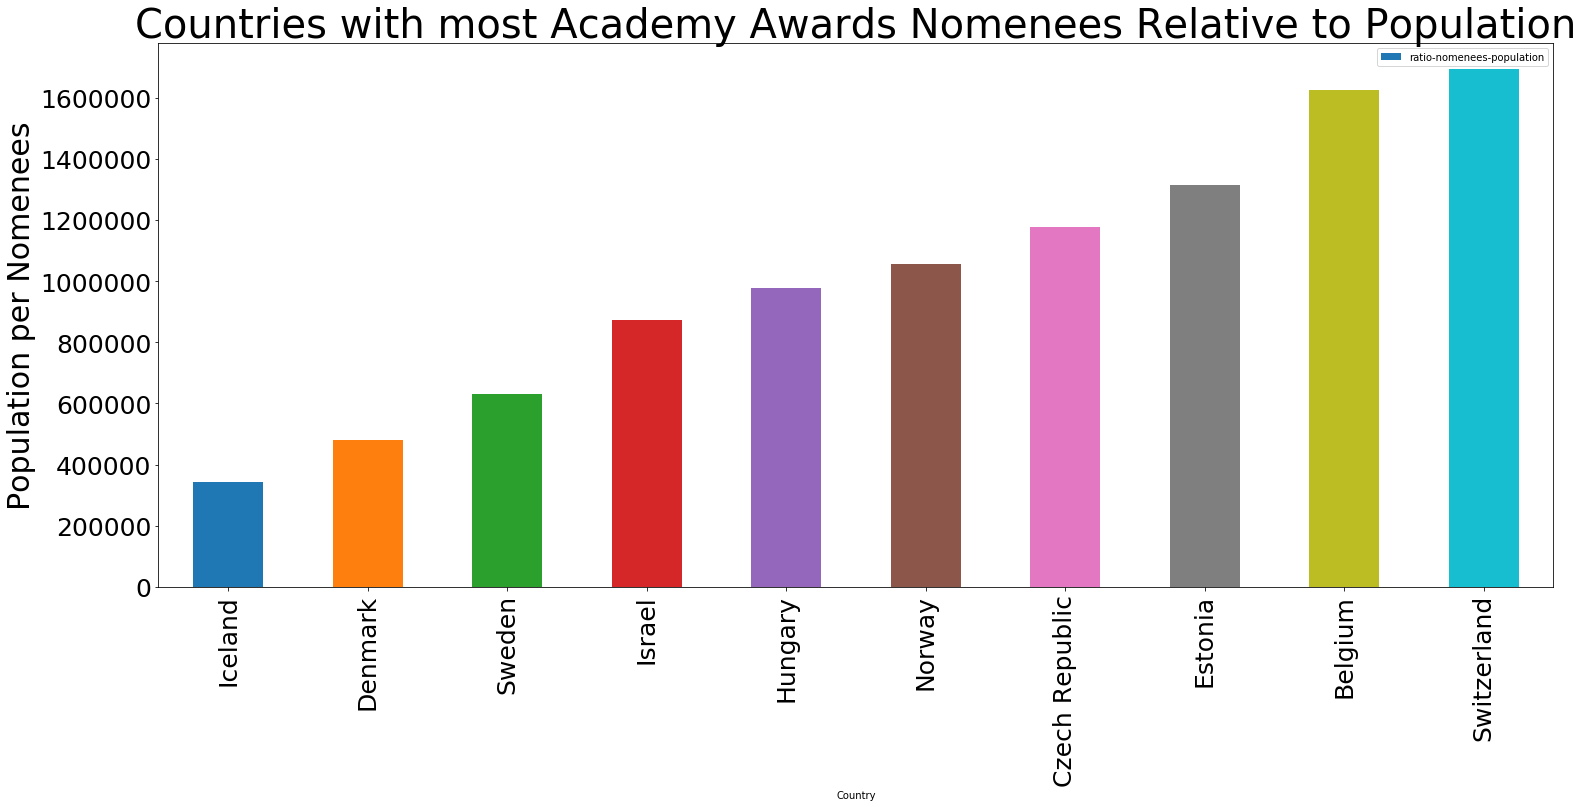

In [69]:

Table1 = ratio[0:10].plot.bar(x='Country', y='ratio-nomenees-population',figsize=(25,10) ,fontsize=25)
Table1.set_ylabel("Population per Nomenees",fontsize=30)
Table1.set_title("Countries with most Academy Awards Nomenees Relative to Population",fontsize=40)

In [ ]:
nomenees = movies_df.sort_values(by='Nomenees')

Table1 = ratio[0:10].plot.bar(x='Country', y='ratio-nomenees-population',figsize=(25,10) ,fontsize=25)
Table1.set_ylabel("Population per Nomenees",fontsize=30)
Table1.set_title("Countries with most Academy Awards Nomenees Relative to Population",fontsize=40)



WebDriverException: Message: chrome not reachable
  (Session info: chrome=73.0.3683.86)
  (Driver info: chromedriver=73.0.3683.68 (47787ec04b6e38e22703e856e101e840b65afe72),platform=Windows NT 10.0.17134 x86_64)
